<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [2]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [3]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [6]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

---


# Test Environment


In [16]:
import pandas as pd

# Charger le fichier CSV
df = pd.read_csv("dataset.csv")

# Afficher les 5 premières lignes de la dataframe
print("Les 5 premières lignes de la dataframe :")
print(df.head(5))


Les 5 premières lignes de la dataframe :
     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [17]:
missing_values = df.isnull().sum()
print("Colonnes avec des valeurs manquantes :")
print(missing_values[missing_values > 0])

Colonnes avec des valeurs manquantes :
tax    3
dtype: int64


In [19]:
missing_rows = df[df.isnull().any(axis=1)]
print("Lignes avec des valeurs manquantes :")
print(missing_rows)

Lignes avec des valeurs manquantes :
                        model  year transmission  mileage fuelType  tax   mpg  \
14861   Grand Tourneo Connect  2015       Manual    30760   Diesel  NaN  58.9   
15587                    Kuga  2018       Manual    26526   Diesel  NaN  56.5   
16941                  Fiesta  2011       Manual    45000   Petrol  NaN  50.4   

       engineSize  price  
14861         1.6  10995  
15587         2.0  16500  
16941         1.2   4995  


In [23]:
mean_tax = df['tax'].mean()
print ( mean_tax)

113.3291766408729


In [28]:
df['tax'].fillna(mean_tax, inplace=True)

<ipython-input-28-616e35f49598>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tax'].fillna(mean_tax, inplace=True)


In [32]:
print(df['tax'].isnull().sum()) 

0


In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df.to_csv("dataset_nettoye.csv", index=False)

## Authors


In [38]:
# Étape 1 : Sélectionner uniquement les colonnes numériques
numeric_columns = df.select_dtypes(include=['number']).columns

# Étape 2 : Calculer la matrice de corrélation sur les colonnes numériques uniquement
correlation_matrix = df[numeric_columns].corr()

# Étape 3 : Récupérer la corrélation avec la colonne cible
target_correlation = correlation_matrix['price'].abs()

# Étape 4 : Trier les corrélations par ordre décroissant et exclure la corrélation de la colonne cible avec elle-même
top_5_attributes = target_correlation.drop('price').sort_values(ascending=False).head(5)

# Afficher les 5 attributs les plus corrélés avec la colonne cible
print(top_5_attributes)


year          0.635715
mileage       0.530483
engineSize    0.411451
tax           0.405970
mpg           0.346263
Name: price, dtype: float64


In [39]:
# Compter le nombre de voitures pour chaque type de carburant
fuel_type_counts = df['fuelType'].value_counts()

# Afficher le résultat
print(fuel_type_counts)


fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


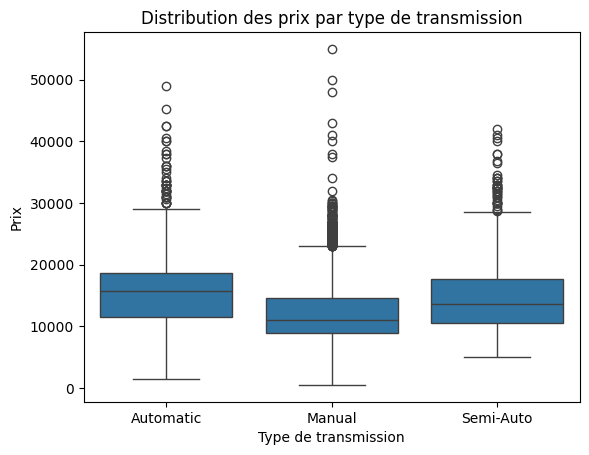

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un boxplot pour visualiser la distribution des prix en fonction du type de transmission
sns.boxplot(x='transmission', y='price', data=df)

# Ajouter un titre et des étiquettes aux axes
plt.title('Distribution des prix par type de transmission')
plt.xlabel('Type de transmission')
plt.ylabel('Prix')

# Afficher le graphique
plt.show()


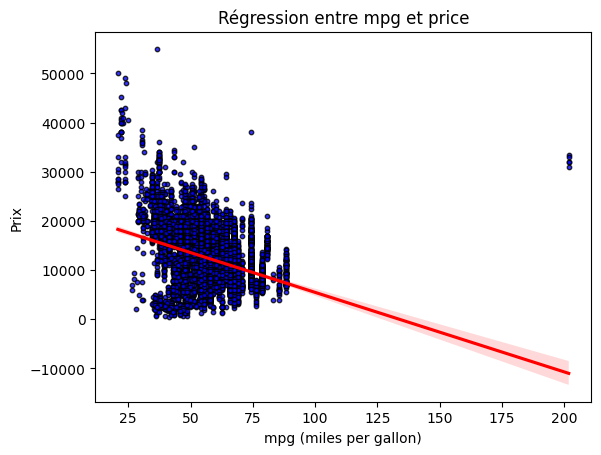

In [54]:
# Créer un graphique de régression entre mpg et price
sns.regplot(x='mpg', y='price', data=df, scatter_kws={'s': 10, 'color': 'blue', 'edgecolor': 'black'}, line_kws={'color': 'red'})

# Ajouter un titre et des étiquettes aux axes
plt.title('Régression entre mpg et price')
plt.xlabel('mpg (miles per gallon)')
plt.ylabel('Prix')

# Afficher le graphique
plt.show()


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Sélectionner les variables source (mpg) et cible (price)
X = df[['mpg']]  # Caractéristique (mpg)
y = df['price']  # Cible (price)

# Diviser les données en ensemble d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle de régression linéaire
model = LinearRegression()

# Ajuster le modèle aux données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)  # Erreur quadratique moyenne
r2 = r2_score(y_test, y_pred)  # Coefficient de détermination R²

# Afficher les résultats
print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Coefficient de détermination (R²) : {r2}")

# Afficher les coefficients de la régression
print(f"Coefficient (pente) : {model.coef_[0]}")
print(f"Ordonnée à l'origine (intercept) : {model.intercept_}")


Erreur quadratique moyenne (MSE) : 19049855.140110757
Coefficient de détermination (R²) : 0.1504343741072478
Coefficient (pente) : -155.04689927354957
Ordonnée à l'origine (intercept) : 21248.726152045663


In [56]:
# Diviser les données en variables indépendantes (X) et variable cible (y)
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Variables indépendantes
y = df['price']  # Variable cible

# Diviser les données en ensemble d'entraînement et de test (80% entraînement, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importer et ajuster le modèle de régression linéaire

model = LinearRegression()

# Ajuster le modèle
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer R² et MSE


# Calculer R²
r2 = r2_score(y_test, y_pred)

# Calculer l'Erreur Quadratique Moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)

# Afficher les résultats
print(f"Coefficient de détermination (R²) : {r2}")
print(f"Erreur quadratique moyenne (MSE) : {mse}")


Coefficient de détermination (R²) : 0.6917125923771564
Erreur quadratique moyenne (MSE) : 6912744.910746688


In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [58]:
#Pipeline :Le StandardScaler est utilisé pour normaliser les données (mettre toutes les caractéristiques à la même échelle),
#PolynomialFeatures(degree=2) génère des caractéristiques polynomiales de second degré à partir des caractéristiques d'origine.
#Cela permet d'ajouter des interactions non linéaires entre les variables
#,LinearRegression() ajuste le modèle de régression linéaire sur les données transformées.

# Sélectionner les variables indépendantes et la variable cible
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Variables indépendantes
y = df['price']  # Variable cible

# Diviser les données en ensemble d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le pipeline avec StandardScaler, PolynomialFeatures et LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),                   # Standardisation des données
    ('poly', PolynomialFeatures(degree=2)),         # Caractéristiques polynomiales de degré 2
    ('regressor', LinearRegression())               # Régression linéaire
])

# Ajuster le pipeline aux données d'entraînement
pipeline.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Calculer R² et MSE
r2 = r2_score(y_test, y_pred)  # Coefficient de détermination
mse = mean_squared_error(y_test, y_pred)  # Erreur quadratique moyenne

# Afficher les résultats
print(f"Coefficient de détermination (R²) : {r2}")
print(f"Erreur quadratique moyenne (MSE) : {mse}")


Coefficient de détermination (R²) : 0.12122807147174242
Erreur quadratique moyenne (MSE) : 19704749.61491952


In [60]:
from sklearn.linear_model import Ridge

In [61]:
#Le modèle de régression Ridge est une méthode de régression linéaire qui inclut une pénalité (régularisation) pour éviter le surajustement (overfitting). 
# Le paramètre alpha contrôle l'intensité de cette régularisation. 
# Supposons que X soit l'ensemble des caractéristiques (source attributes) et y la cible (target attribute)
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Exemples de caractéristiques
y = df['price']  # Cible

# 1. Diviser les données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Créer et ajuster un modèle de régression Ridge avec un paramètre de régularisation de 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# 3. Prédire avec les données de test
y_pred = ridge_model.predict(X_test)

# 4. Calculer le MSE et R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Coefficient de détermination (R²) : {r2}")


Erreur quadratique moyenne (MSE) : 6912725.801054926
Coefficient de détermination (R²) : 0.6917134446113138


In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score


In [64]:
# 1. Diviser les données en ensemble d'entraînement et de test
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Remplacez par vos caractéristiques
y = df['price']  # Remplacez par votre attribut cible

# Diviser en 80% entraînement et 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Appliquer la transformation polynomiale de second degré
poly = PolynomialFeatures(degree=2)

# Appliquer à l'ensemble d'entraînement
X_train_poly = poly.fit_transform(X_train)

# Appliquer à l'ensemble de test (en utilisant les mêmes transformations que pour l'entraînement)
X_test_poly = poly.transform(X_test)

# 3. Création d'un pipeline et recherche par grille
ridge = Ridge()

# Paramètres de recherche pour alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# GridSearch avec validation croisée (4 plis)
#La grille recherche la valeur d'alpha qui minimise l'erreur quadratique moyenne (MSE) en utilisant la fonction scoring='neg_mean_squared_error'.
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly, y_train)

# 4. Calculer le MSE et le R² avec l'alpha optimal sur les données de test
best_alpha = grid_search.best_params_['alpha']  # Meilleur alpha
best_model = grid_search.best_estimator_  # Meilleur modèle ajusté avec alpha optimal

# Prédictions sur les données de test
y_pred = best_model.predict(X_test_poly)

# Calcul du MSE
mse = mean_squared_error(y_test, y_pred)

# Calcul du R²
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f"Meilleur alpha trouvé : {best_alpha}")
print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"Coefficient de détermination (R²) : {r2}")


/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.88233e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.01744e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.78199e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-24): res

Meilleur alpha trouvé : 0.01
Erreur quadratique moyenne (MSE) : 13840985.117578594
Coefficient de détermination (R²) : 0.38273414165607345


In [65]:
#conclusion : Le modèle de régression Ridge avec un alpha de 0.01 explique environ 38% de la variabilité des prix des voitures (R² = 0.38), ce qui indique une performance modérée. L'erreur quadratique moyenne (MSE) est relativement élevée, suggérant que des améliorations peuvent être apportées, soit par l'ajout de nouvelles caractéristiques, soit par l'optimisation des paramètres du modèle.

[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
